# 🏁 Kart Lap Times Analysis

## 📘 Project Summary

This notebook is part of the **Kart Lap Times Analysis** project — a data analytics case study focused on understanding patterns and performance in go-kart racing lap times.

The dataset was scraped from a public kart timing website and processed to analyze:
- Driver performance trends  
- Track-specific lap time variations  
- Consistency and improvement over multiple sessions  
- Factors influencing lap speed (e.g., driver, track, conditions)

---

## 🎯 Objectives

1. **Data Collection:**  
   Use Python web scraping tools to extract lap time records from an online leaderboard.

2. **Data Cleaning & Preparation:**  
   Convert scraped data into structured formats (CSV, Pandas DataFrame), handle missing values, and normalize time formats.

3. **Exploratory Data Analysis (EDA):**  
   - Identify the fastest drivers and average lap time distributions.  
   - Visualize performance differences across tracks or sessions.  
   - Detect anomalies or outliers in recorded lap times.

4. **Visualization & Insights:**  
   Use Seaborn and Matplotlib to build visual stories that reveal key insights and trends.

5. **Conclusions & Recommendations:**  
   Summarize findings and discuss possible next steps (e.g., predictive modeling or strategy optimization).

---

## 🧰 Tools & Technologies

| Purpose | Tools Used |
|----------|-------------|
| Web Scraping | `requests`, `BeautifulSoup4` |
| Data Handling | `pandas`, `numpy` |
| Visualization | `matplotlib`, `seaborn` |
| Analysis | `jupyter`, `python 3.x` |

---

## 📂 Notebook Outline

1. **Introduction & Data Overview**  
2. **Data Cleaning and Preprocessing**  
3. **Exploratory Data Analysis (EDA)**  
4. **Visual Insights**  
5. **Conclusions and Future Work**

---

## 🚀 Next Steps

- Enrich dataset with additional variables (e.g., weather, driver age).  
- Build a regression or time-series model to predict lap times.  
- Automate regular data scraping and dashboard updates.

---

> **Author:** Your Name  
> **Repository:** [GitHub Link to Project]  
> **Last Updated:** October 2025


In [11]:
import os

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pylab as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

import locale
locale.setlocale(locale.LC_TIME, "nl_NL.UTF-8")

'nl_NL.UTF-8'

## Overall analysis

Statistics:  
Fastest driver per track (GOAT): different tracks  
Do drivers get better: average speed increase over lap  
Impact of aging: average fastest lap decay over time  
Does it matter witch kart you drive: difference between 2 karts in a window

Economics:  
revenue per day (average per customer)  

number of recuring customers per day  
max number of possible drivers per day  
missed opertunity  

Staff planning: correlation between weather and number of customers  


## Heat analysis of my own heat

Selecteer:
- locatie
- heat (open om de coureurs te zien)
- coureur
- keuze:
    - export lap tijden per coureur
    - selecteer 2de heat

App:
1. Heat:
    - (bar) Positie
    - (line) Snelste ronde per lap
    - (table) Statistieken
2. Eigen prestatie:
    - (line) Lap tijden
    - (hist) Snelste lap t.o.v. afgelopen maand
    - (hist) Snelste lap t.o.v. afgelopen jaar
3. Heat vergelijken:
    - (line) Ronde tijd per lap
4. Groep vergelijken:
    - (line) fastest lap per heat
    - (table) statistieken

In [5]:
df = pd.read_csv("data.csv", parse_dates=["datetime"])

In [6]:
df.head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft


In [7]:
df.dtypes

heat_id              object
heat_name            object
datetime     datetime64[ns]
name                 object
kart                  int64
lap_time            float64
lap                   int64
location             object
dtype: object

In [41]:
df["date"] = pd.to_datetime(df["datetime"].dt.date)
df["hour"] = df["datetime"].dt.hour
df["iso_week"] = df["datetime"].dt.isocalendar().week
df["iso_year"] = df["datetime"].dt.isocalendar().year
df["year_month"] = df["datetime"].values.astype("datetime64[M]")

In [14]:
df["heat_min"] = df.groupby("heat_id")["lap_time"].transform("min")
df["track"] = df["heat_min"].apply(lambda x: 'A' if x < 34.37 else ('B' if x < 60.24 else 'C'))

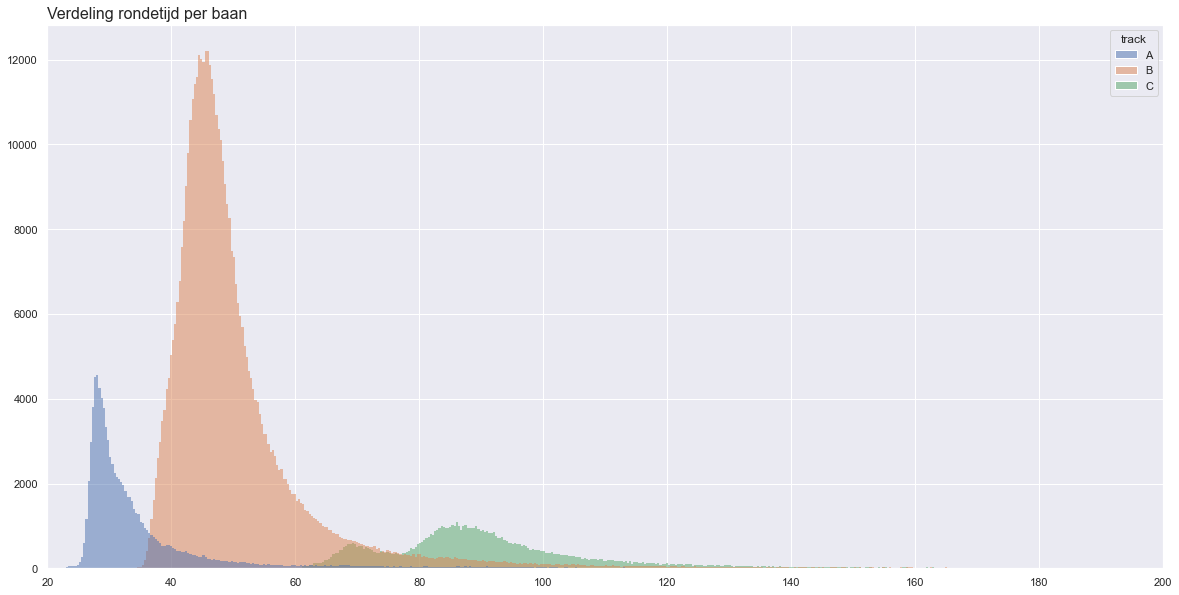

In [16]:
ax = sns.histplot(
    data=df[df["location"] == "delft"],
    x="lap_time",
    hue="track"
)
plt.xlim(20, 200)

ax.set_title("Verdeling rondetijd per baan", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

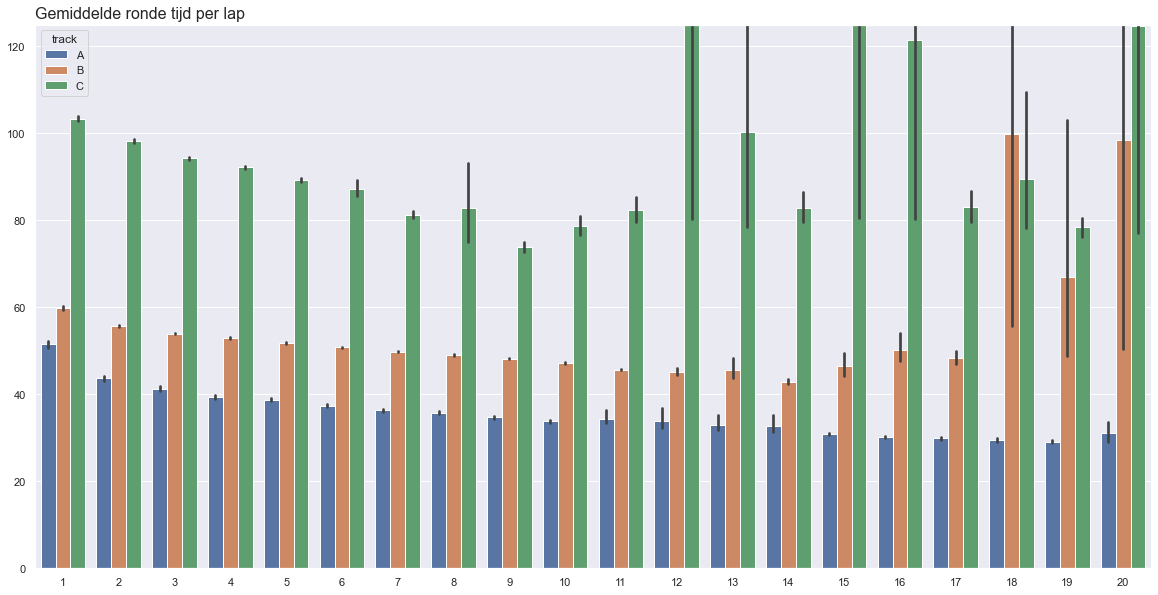

In [50]:
ax = sns.barplot(
    data=df[
        (df["location"] == "delft")
#         & (df["track"] == 'B')
        & (df["lap"] <= 20)
    ],
    x="lap",
    y="lap_time",
    hue="track"

#     color='b'
)
plt.ylim(0, 125)

ax.set_title("Gemiddelde ronde tijd per lap", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

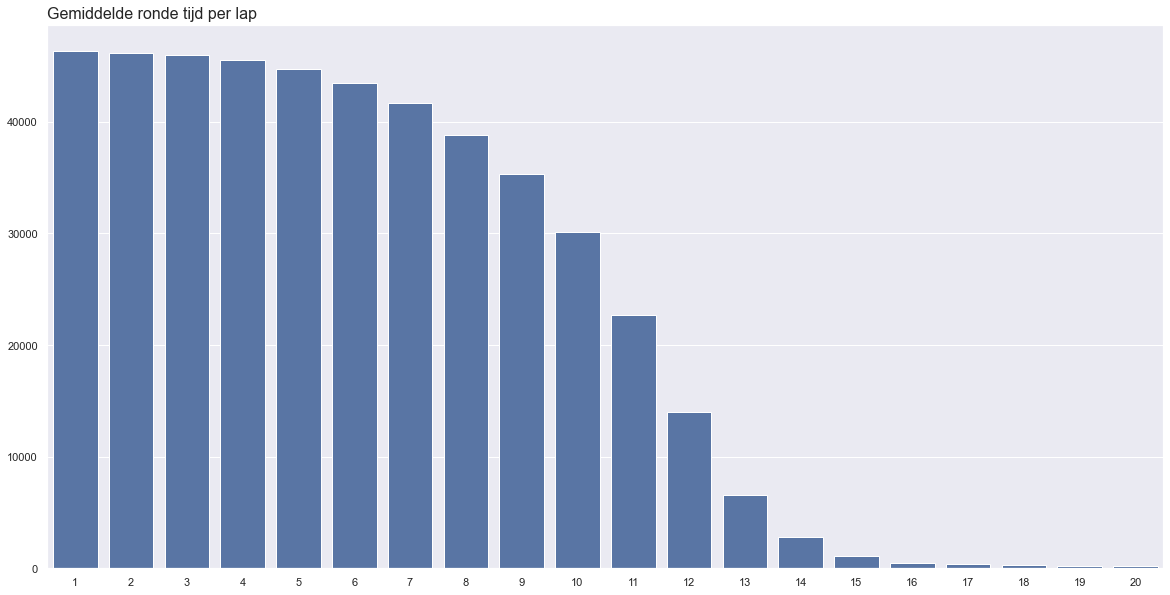

In [26]:
ax = sns.barplot(
    data=df[
        (df["location"] == "delft")
        & (df["track"] == 'B')
        & (df["lap"] <= 20)
    ].groupby("lap")["heat_id"].count().reset_index(),
    x="lap",
    y="heat_id",
    color='b'
)

ax.set_title("Aantal gereden laps", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [47]:
df.head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,heat_min,track,date,hour,year_month,iso_week,iso_year
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025


In [56]:
heat_duration = df[df["location"] == "delft"] \
    .groupby(["track", "heat_id", "name"])["lap_time"].sum().reset_index() \
    .groupby(["track", "heat_id"])["lap_time"].max().reset_index()

heat_duration["lap_time"] = heat_duration["lap_time"]/60

In [57]:
heat_duration.head()

,track,heat_id,lap_time
0,A,006373CB17634EEC8BCB9C15F9569A90,10.01
1,A,0084AD71D865400CA3DF2FB3C69E4C2D,9.37
2,A,00F34F9F0E4341578E53081E3AE04E0F,9.83
3,A,011D1448B01B4FC7B9A334A41C7599C4,9.90
4,A,015FEFCFA7DF437C956AAA1896AF149F,9.86


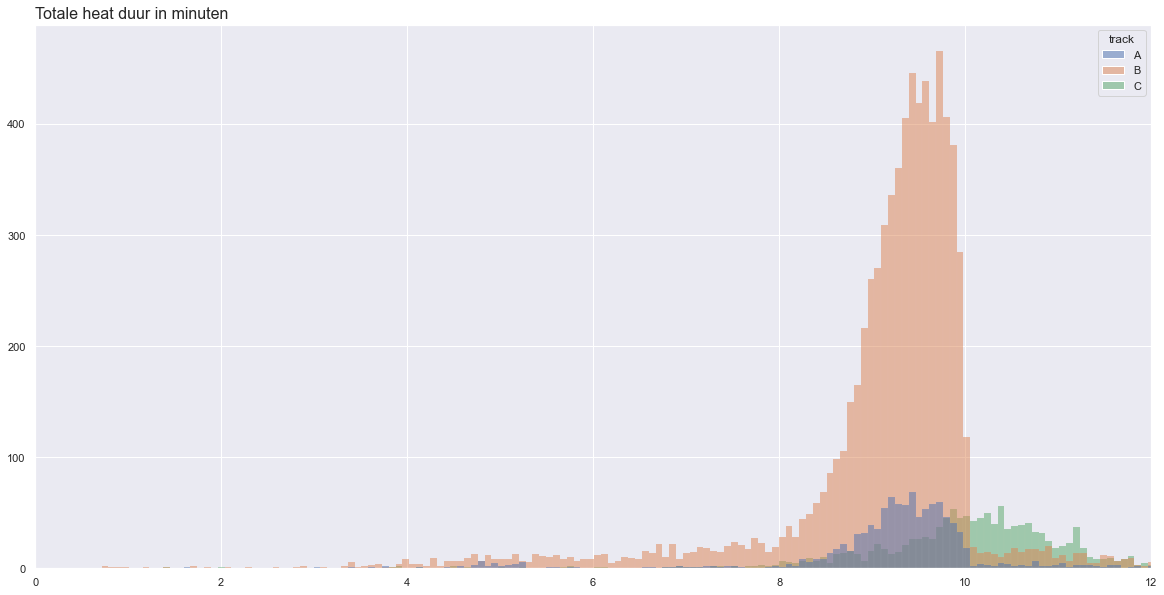

In [59]:
ax = sns.histplot(
    data=heat_duration,
    x="lap_time",
    hue="track"
)
plt.xlim(0, 12)

ax.set_title("Totale heat duur in minuten", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

### Recuring customers

In [83]:
temp = df[["location", "heat_id", "date", "name"]].drop_duplicates()
temp = temp.groupby(["location", "date", "name"])["heat_id"].count().reset_index()

In [84]:
temp = temp.groupby("heat_id")["name"].count().reset_index()
temp["%"] = temp["name"].div(temp["name"].sum()).mul(100)

In [85]:
temp

,heat_id,name,%
0,1,28159,48.87
1,2,23823,41.35
2,3,4380,7.60
3,4,393,0.68
4,5,767,1.33
5,6,34,0.06
6,7,60,0.10
7,8,1,0.00
8,12,1,0.00


In [ ]:
ax = sns.barplot(
    data=temp.groupby(["location", "date", "name"])["heat_id"].count().reset_index(),
    x="lap",
    y="heat_id",
    color='b'
)

ax.set_title("Aantal gereden laps", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [60]:
df.groupby(["location"])

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,heat_min,track,date,hour,year_month,iso_week,iso_year
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647285,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,45.29,6,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647286,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,45.69,7,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647287,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,44.88,8,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647288,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,46.30,9,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025


In [102]:
df[df["location"] == "delft"].groupby("date")["heat_id"].count()

date
2025-01-01    2970
2025-01-02    6236
2025-01-03    5446
2025-01-04    6311
2025-01-05    1484
              ... 
2025-09-26    2581
2025-09-27    4425
2025-09-28    4162
2025-09-29    1899
2025-09-30    1621
Name: heat_id, Length: 272, dtype: int64

<AxesSubplot:xlabel='heat_id', ylabel='Count'>

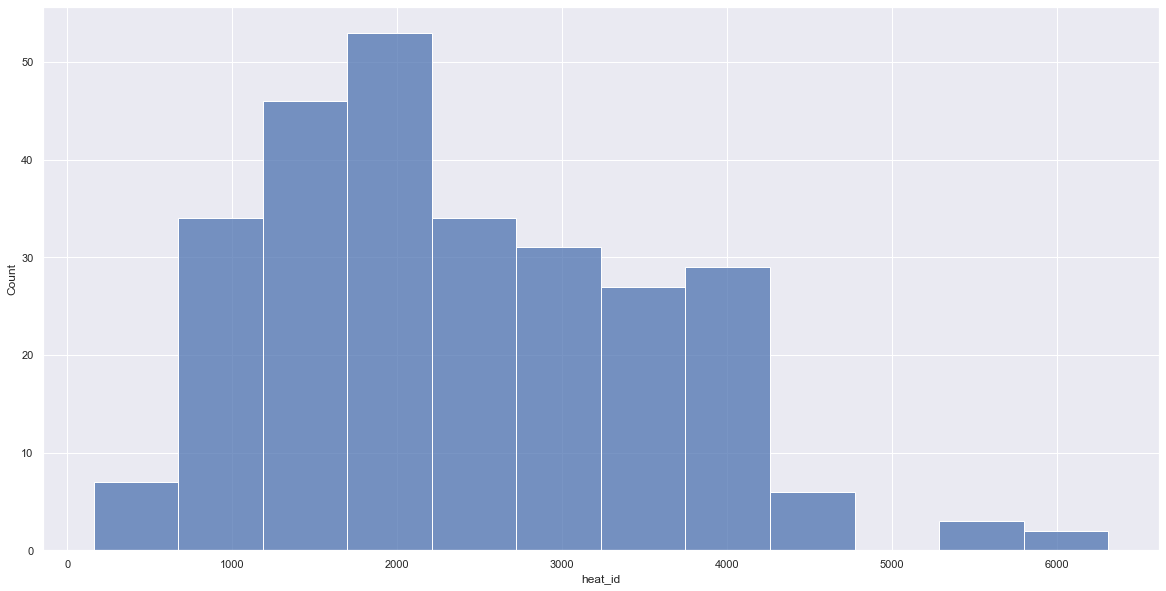

In [104]:
sns.histplot(
    data=df[df["location"] == "delft"].groupby("date")["heat_id"].count().reset_index(),
    x="heat_id"
)
# plt.xlim(0, 400)

## Aantallen

In [92]:
customers = df[["location", "date", "heat_id", "name"]].drop_duplicates()

In [93]:
customers["year"] = customers["date"].dt.year
customers["month"] = customers["date"].dt.month

In [94]:
customers.head()

,location,date,heat_id,name,year,month
0,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Tymon Keler,2025,2
15,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Svens Jelnieks,2025,2
31,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Ethan Sheldon,2025,2
46,delft,2025-02-01,269886A38DF54694805E8518A1AB36CA,Bas Dalmulder,2025,2
59,delft,2025-02-01,269886A38DF54694805E8518A1AB36CA,Brydon Leonard,2025,2


<AxesSubplot:xlabel='month', ylabel='heat_id'>

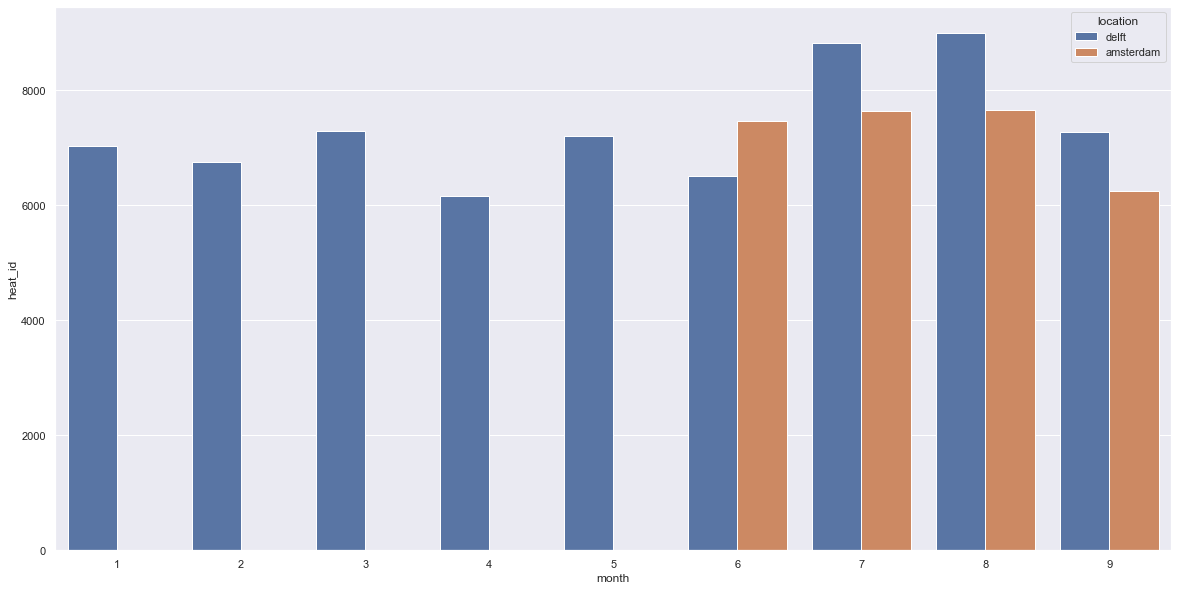

In [95]:
sns.barplot(
    data=customers.groupby(["year", "month", "location"])["heat_id"].count().reset_index(),
    x="month",
    y="heat_id",
    hue="location"
)

In [90]:
# Number of heats per month
customers.groupby(["year", "month"])["heat_id"].nunique()

year  month
2025  1        1021
      2        1043
      3        1064
      4        1031
      5        1068
      6        2128
      7        2538
      8        2766
      9        1977
Name: heat_id, dtype: int64

In [91]:
# Number of customers per month
customers.groupby(["year", "month"])["heat_id"].count()

year  month
2025  1         7022
      2         6745
      3         7293
      4         6163
      5         7204
      6        13969
      7        16457
      8        16648
      9        13517
Name: heat_id, dtype: int64

In [254]:
# Geschatte omzet
drivers.groupby("month")["omzet"].sum()

month
5      13082
6     208692
7     188821
8     210583
9     176514
10    211203
11    233430
12     19468
Name: omzet, dtype: int64